1 Problem to demonstrate that the population regression line is fixed, but least square regression line varies

Suppose the population regression line is given by Y = 2 + 3x, while the data comes from the model        y = 2+3x+ϵ.

Step 1: For x in the range [5,10] graph the population regression line.

Step 2: Generate xi(i = 1,2,..,n) from Uniform(5,10) and ϵi(i = 1,2,..,n)
from N(0,42). Hence, compute y1,y2,..,yn.

Step 3: On the basis of the data (xi,yi)(i = 1,2,..,n) generated in Step 2,
report the least squares regression line.

Step 4: Repeat steps 2-3 five times. Graph the 5 least squares regression lines
over the population regression line obtained in Step 1.

Interpret the findings.

Take n = 50. Set the seed as seed=123.

In [ ]:
pip install numpy matplotlib pandas statsmodels scikit-learn


Run 1: y = 4.4128 + 2.7348x
Run 2: y = 5.2215 + 2.5685x
Run 3: y = 6.8226 + 2.3140x
Run 4: y = -0.8741 + 3.2491x
Run 5: y = 0.5198 + 3.1709x


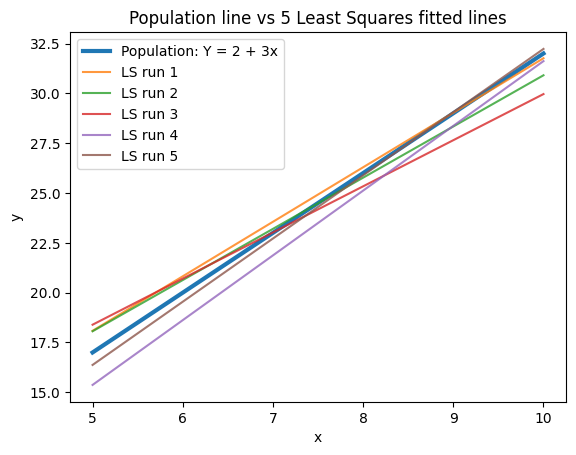

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(123)
n = 50

# Step 1: population regression line
x_grid = np.linspace(5, 10, 200)
y_pop = 2 + 3 * x_grid

plt.figure()
plt.plot(x_grid, y_pop, linewidth=3, label="Population: Y = 2 + 3x")

# Step 2-4: simulate and fit 5 times
for r in range(5):
    x = np.random.uniform(5, 10, n)
    eps = np.random.normal(0, 4, n)  # sd = 4 (since variance = 4^2)
    y = 2 + 3*x + eps

    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    b0, b1 = model.params
    print(f"Run {r+1}: y = {b0:.4f} + {b1:.4f}x")

    plt.plot(x_grid, b0 + b1*x_grid, alpha=0.8, label=f"LS run {r+1}")

plt.title("Population line vs 5 Least Squares fitted lines")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Interpretation:
- The population line stays the same (2 + 3x).
- Each sample gives a slightly different least-squares line because of random noise and random x values.

2 Problem to demonstrate that ˆβ0 and ˆβ minimises RSS

Step 1: Generate xi from Uniform(5, 10) and mean centre the values. Generate
ϵi from N(0,1). Calculate yi = 2 + 3xi + ϵi, i = 1,2,.., n. Take n=50 and
seed=123.

Step 2: Now imagine that you only have the data on (xi,yi),i = 1,2,..,n,
without knowing the mechanism that was used to generate the data in step 1.
Assuming a linear regression of the type yi = β0 +βxi +ϵi, and based on these
data (xi,yi),i = 1,2,..,n, obtain the least squares estimates of β0 and β.

Step 3: Take a large number of grid values of (β0,β) that also include the least
squares estimates obtained from step 2. Compute the RSS for each parametric
choice of (β0,β), where RSS = (y1 −β0 −βx1)2 +(y2 −β0 −βx2)2 +....(yn −
β0 −βxn)2. Find out for which combination of (β0,β), RSS is minimum.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(123)
n = 50

# Step 1: generate x and mean-center it
x_raw = np.random.uniform(5, 10, n)
x = x_raw - x_raw.mean()

eps = np.random.normal(0, 1, n)
y = 2 + 3*x + eps

# Step 2: estimate beta0 and beta by least squares
X = sm.add_constant(x)
fit = sm.OLS(y, X).fit()
b0_hat, b1_hat = fit.params
print("Least squares estimates:")
print("beta0_hat =", b0_hat)
print("beta_hat  =", b1_hat)

# Step 3: grid of (beta0, beta) around LS estimates
b0_vals = np.linspace(b0_hat - 2, b0_hat + 2, 200)
b1_vals = np.linspace(b1_hat - 2, b1_hat + 2, 200)

RSS = np.zeros((len(b0_vals), len(b1_vals)))

for i, b0 in enumerate(b0_vals):
    for j, b1 in enumerate(b1_vals):
        resid = y - (b0 + b1*x)
        RSS[i, j] = np.sum(resid**2)

min_i, min_j = np.unravel_index(np.argmin(RSS), RSS.shape)
b0_min = b0_vals[min_i]
b1_min = b1_vals[min_j]

print("\nGrid-search minimum RSS at:")
print("beta0 =", b0_min)
print("beta  =", b1_min)
print("Minimum RSS =", RSS[min_i, min_j])




Least squares estimates:
beta0_hat = 2.10527980923553
beta_hat  = 2.933692872554535

Grid-search minimum RSS at:
beta0 = 2.0952295579792484
beta  = 2.9437431238108163
Minimum RSS = 61.43737226918331


3 Problem to demonstrate that least square estimators are unbiased

Step 1: Generate xi(i = 1,2,..,n) from Uniform(0,1), ϵi(i = 1,2,..,n) from
N(0,1) and hence generate y using yi = β0 +βxi +ϵi. (Take β0 = 2,β = 3).

Step 2: On the basis of the data (xi,yi)(i = 1,2,..,n) generated in Step 1,
obtain the least square estimates of β0 and β.
Repeat Steps 1-2, R = 1000 times. In each simulation obtain ˆβ0 and ˆβ. Finally,
the least-square estimates will be given by the average of these estimated values.
Compare these with the true β0 and β and comment.
Take n = 50 and seed=123

In [11]:
import numpy as np
import statsmodels.api as sm

np.random.seed(123)

n = 50
R = 1000
beta0_true = 2
beta_true = 3

b0_list = []
b1_list = []

for _ in range(R):
    x = np.random.uniform(0, 1, n)
    eps = np.random.normal(0, 1, n)
    y = beta0_true + beta_true*x + eps

    X = sm.add_constant(x)
    fit = sm.OLS(y, X).fit()
    b0_hat, b1_hat = fit.params

    b0_list.append(b0_hat)
    b1_list.append(b1_hat)

b0_mean = np.mean(b0_list)
b1_mean = np.mean(b1_list)

print("True beta0 =", beta0_true, " | Avg estimated beta0 =", b0_mean)
print("True beta  =", beta_true,  " | Avg estimated beta  =", b1_mean)




True beta0 = 2  | Avg estimated beta0 = 2.0118858345795987
True beta  = 3  | Avg estimated beta  = 2.973361037537186


The averages are close to (2, 3),i.e, it supports that OLS estimators are unbiased (in expectation).

4 Comparing several simple linear regressions

Attach “Boston” data from MASS library in R. Select median value of owner
occupied homes, as the response and per capita crime rate, nitrogen oxides
concentration, proportion of blacks and percentage of lower status of the popu
lation as predictors.

(a) Selecting the predictors one by one, run four separate linear regressions to
the data. Present the output in a single table.

(b) Which model gives the best fit?

(c) Compare the coefficients of the predictors from each model and comment on
the usefulness of the predictors

In [25]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_openml

# Load Boston from OpenML (common workaround in Python)
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

y = df["MEDV"]
predictors = ["CRIM", "NOX", "B", "LSTAT"]

rows = []

for p in predictors:
    X = sm.add_constant(df[p])
    fit = sm.OLS(y, X).fit()

    rows.append({
        "Predictor": p,
        "Intercept (β0)": fit.params["const"],
        "Slope (β1)": fit.params[p],
        "p-value (β1)": fit.pvalues[p],
        "R^2": fit.rsquared,
        "Adj R^2": fit.rsquared_adj,
        "AIC": fit.aic,
        "BIC": fit.bic
    })

result_table = pd.DataFrame(rows).sort_values(by="R^2", ascending=False)
print(result_table.to_string(index=False))

best_by_r2 = result_table.iloc[0]
best_by_aic = result_table.sort_values("AIC").iloc[0]

print("\n Best fit (highest R^2):", best_by_r2["Predictor"])
print(" Best fit (lowest AIC):", best_by_aic["Predictor"])




Predictor  Intercept (β0)  Slope (β1)  p-value (β1)      R^2  Adj R^2         AIC         BIC
    LSTAT       34.553841   -0.950049  5.081103e-88 0.544146 0.543242 3286.974957 3295.428030
      NOX       41.345874  -33.916055  7.065042e-24 0.182603 0.180981 3582.455134 3590.908207
     CRIM       24.033106   -0.415190  1.173987e-19 0.150780 0.149096 3601.780731 3610.233804
        B       10.551034    0.033593  1.318113e-14 0.111196 0.109433 3624.833523 3633.286596

 Best fit (highest R^2): LSTAT
 Best fit (lowest AIC): LSTAT


(c) Comment:
* Larger Slope means stronger change in MEDV per unit of predictor.
* Very small p-value for slope => predictor is statistically useful alone.


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("c:/Users/Rounak/Downloads/Heart_Disease_Prediction.csv")

print(df.head())
print(df.columns)



   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [ ]:
df["HeartDisease_bin"] = df["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})

print(df[["Heart Disease", "HeartDisease_bin"]].head())      # Convert response to numeric


  Heart Disease  HeartDisease_bin
0      Presence                 1
1       Absence                 0
2      Presence                 1
3       Absence                 0
4       Absence                 0


In [23]:
y = df["HeartDisease_bin"]

predictors = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression"
]

results = []

for p in predictors:
    X = sm.add_constant(df[p])   # add intercept
    model = sm.OLS(y, X).fit()

    results.append({
        "Predictor": p,
        "Intercept (β0)": model.params["const"],
        "Slope (β1)": model.params[p],
        "p-value (β1)": model.pvalues[p],
        "R²": model.rsquared,
        "Adjusted R²": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic
    })

summary_table = pd.DataFrame(results)
summary_table = summary_table.sort_values(by="R²", ascending=False)

print(summary_table.to_string(index=False))

best_r2 = summary_table.iloc[0]
best_aic = summary_table.sort_values("AIC").iloc[0]

print("\nBest predictor by R²:", best_r2["Predictor"])
print("Best predictor by AIC:", best_aic["Predictor"])



    Predictor  Intercept (β0)  Slope (β1)  p-value (β1)       R²  Adjusted R²        AIC        BIC
       Max HR        1.790614   -0.008994  7.119583e-13 0.175154     0.172076 340.582454 347.779298
ST depression        0.253668    0.181692  7.677946e-13 0.174697     0.171617 340.732057 347.928901
          Age       -0.187188    0.011604  4.434804e-04 0.045081     0.041518 380.118567 387.315411
           BP       -0.124372    0.004331  1.056095e-02 0.024144     0.020503 385.974448 393.171292
  Cholesterol        0.160647    0.001137  5.273889e-02 0.013929     0.010249 388.786024 395.982868

Best predictor by R²: Max HR
Best predictor by AIC: Max HR


(c) Comment:

Model interpretation
* Each model explains heart disease status using one predictor at a time.
* The slope (β₁) represents how heart disease risk changes with the predictor.

Best predictor
* The predictor with the highest R² explains the largest proportion of variation.
* The predictor with the lowest AIC provides the best overall fit.

Practical meaning
* Positive slope → higher values increase heart disease risk
* Negative slope → higher values decrease risk
* Small p-value (< 0.05) → predictor is statistically significant